In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/TCSMFrogdance/mrnamanalysis/main/buoi2/ketquaxettuyendaihoc.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      100 non-null    int64  
 1   TOAN10          100 non-null    float64
 2   LY10            100 non-null    float64
 3   HOA10           100 non-null    float64
 4   SINH10          100 non-null    float64
 5   VAN10           100 non-null    float64
 6   SU10            100 non-null    float64
 7   DIA10           100 non-null    float64
 8   NGOAI NGU10     100 non-null    float64
 9   TOAN11          100 non-null    float64
 10  LY11            100 non-null    float64
 11  HOA11           100 non-null    float64
 12  SINH11          100 non-null    float64
 13  VAN11           100 non-null    float64
 14  SU11            100 non-null    float64
 15  DIA11           100 non-null    float64
 16  NGOAI NGU11     100 non-null    float64
 17  TOAN12          100 non-null    floa

In [3]:
df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
df.head()

,TOAN10,LY10,HOA10,SINH10,VAN10,SU10,DIA10,NGOAI NGU10,TOAN11,LY11,...,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,KQXT
0,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,8.9,...,7.00,7.54,7.01,K,K,K,2.800,3.016,2.804,ROT
1,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,5.4,...,4.69,5.47,5.07,Y,TB,TB,1.876,2.188,2.028,ROT
2,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,4.9,...,5.77,5.38,6.04,TB,TB,TB,2.308,2.152,2.416,DAU
3,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,6.2,...,6.21,5.20,6.88,TB,TB,K,2.484,2.080,2.752,ROT
4,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,5.5,...,6.50,6.36,6.99,K,TB,K,2.600,2.544,2.796,ROT


In [5]:
df['DIEM THI MON 1'].sort_values()

53    1.00
43    1.25
72    1.50
5     1.50
87    1.75
      ... 
84    6.50
11    6.75
23    6.75
24    7.00
97    7.00
Name: DIEM THI MON 1, Length: 100, dtype: float64

In [6]:
df[['GIOI TINH', 'DIEM THI MON 2']].sort_values(by='GIOI TINH')


,GIOI TINH,DIEM THI MON 2
0,F,3.25
41,F,4.50
42,F,3.50
43,F,3.50
44,F,4.00
...,...,...
64,M,3.75
66,M,4.50
67,M,4.50
69,M,3.75


In [7]:
def Q1(g):
  return np.percentile(g,25)

In [8]:
def Q2(g):
  return np.percentile(g,50)

In [9]:
def Q3(g):
  return np.percentile(g,75)

In [10]:
pivot = pd.pivot_table(df[['DIEM THI MON 1' , 'KHOI THI']], values=['DIEM THI MON 1'], columns=['KHOI THI'], aggfunc=[pd.Series.count ,sum , np.mean ,np.median, min, max, np.std,Q1,Q2,Q3])
pivot

count                          sum                            \
KHOI THI           A   A1    B     C    D1      A    A1     B      C     D1   
DIEM THI MON 1  49.0  6.0  9.0  14.0  22.0  163.5  17.5  29.5  79.25  84.25   

                ...    Q2                          Q3                     \
KHOI THI        ...     A   A1    B     C    D1     A    A1     B      C   
DIEM THI MON 1  ...  3.25  3.0  3.5  5.25  3.75  4.25  3.25  3.75  6.375   

                       
KHOI THI           D1  
DIEM THI MON 1  4.875  

[1 rows x 50 columns]

In [11]:
pivot = pd.pivot_table(df[['DIEM THI MON 1' , 'KHOI THI','KHU VUC THI']], values=['DIEM THI MON 1'], columns=['KHOI THI','KHU VUC THI'], aggfunc=[pd.Series.count ,sum , np.mean ,np.median, min, max, np.std,Q1,Q2,Q3])
pivot

count                                                ...  \
KHOI THI           A              A1         B         C            ...   
KHU VUC THI        1    2   2NT    1  2NT    1  2NT    1    2  2NT  ...   
DIEM THI MON 1  29.0  9.0  11.0  2.0  4.0  8.0  1.0  8.0  2.0  4.0  ...   

                    Q3                                                       \
KHOI THI            A1            B             C                   D1        
KHU VUC THI          1  2NT       1   2NT       1      2     2NT     1    2   
DIEM THI MON 1  2.5625  3.5  3.5625  3.75  5.4375  6.125  6.8125  4.25  5.0   

                      
KHOI THI              
KHU VUC THI      2NT  
DIEM THI MON 1  3.75  

[1 rows x 128 columns]

In [12]:
pivot = pd.pivot_table(df[['DIEM THI MON 1' , 'KHOI THI','KHU VUC THI','DAN TOC']], values=['DIEM THI MON 1'], columns=['KHOI THI','KHU VUC THI','DAN TOC'], aggfunc=[pd.Series.count ,sum , np.mean ,np.median, min, max, np.std,Q1,Q2,Q3])
pivot

count             sum             mean            median  ...  \
KHOI THI           A   D1          A   D1           A   D1            A  ...   
KHU VUC THI        2    1    2     2    1     2     2    1     2      2  ...   
DAN TOC          6.0  1.0  1.0   6.0  1.0   1.0   6.0  1.0   1.0    6.0  ...   
DIEM THI MON 1   1.0  1.0  1.0  4.25  3.0  1.25  4.25  3.0  1.25   4.25  ...   

                 max    Q1               Q2               Q3             
KHOI THI          D1     A   D1           A   D1           A   D1        
KHU VUC THI        2     2    1     2     2    1     2     2    1     2  
DAN TOC          1.0   6.0  1.0   1.0   6.0  1.0   1.0   6.0  1.0   1.0  
DIEM THI MON 1  1.25  4.25  3.0  1.25  4.25  3.0  1.25  4.25  3.0  1.25  

[1 rows x 27 columns]

In [13]:
Tan_suat_GT=df['GIOI TINH'].value_counts()
print(Tan_suat_GT)

M    52
F    48
Name: GIOI TINH, dtype: int64


([<matplotlib.patches.Wedge at 0x204c3ec8c40>,
 [Text(-0.06906950569907239, 1.0978294054098232, 'M'),
  Text(0.06906940291286497, -1.0978294118765723, 'F')])

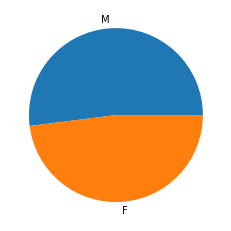

In [14]:
plt.pie(Tan_suat_GT, labels=Tan_suat_GT.index)

(array([ 5.,  5., 14., 12.,  7., 14., 21., 12.,  6.,  4.]),
 array([1.616 , 1.7776, 1.9392, 2.1008, 2.2624, 2.424 , 2.5856, 2.7472,
        2.9088, 3.0704, 3.232 ]),
 <BarContainer object of 10 artists>)

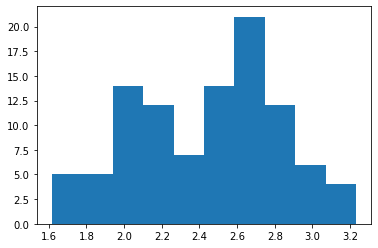

In [15]:
plt.hist(df['US_TBM1'])

(array([ 3.,  8., 19.,  8., 12., 17., 14., 10.,  6.,  3.]),
 array([1.768 , 1.9328, 2.0976, 2.2624, 2.4272, 2.592 , 2.7568, 2.9216,
        3.0864, 3.2512, 3.416 ]),
 <BarContainer object of 10 artists>)

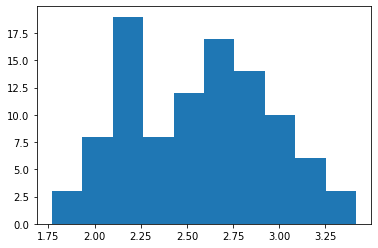

In [16]:
plt.hist(df['US_TBM2'])

(array([ 3.,  4.,  9.,  9., 12., 22., 19., 12.,  6.,  4.]),
 array([1.916, 2.056, 2.196, 2.336, 2.476, 2.616, 2.756, 2.896, 3.036,
        3.176, 3.316]),
 <BarContainer object of 10 artists>)

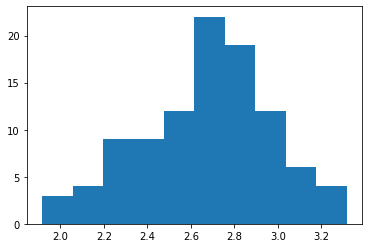

In [17]:
plt.hist(df['US_TBM3'])

In [18]:
tmp_diemdh = df[['KHU VUC THI', 'DIEM THI MON 1', 'DIEM THI MON 2', 'DIEM THI MON 3']].copy()

In [19]:
tmp_diemdh = tmp_diemdh[tmp_diemdh['KHU VUC THI']=='2NT']
tmp_diemdh = tmp_diemdh[tmp_diemdh['DIEM THI MON 1'] >= 5.0]
tmp_diemdh = tmp_diemdh[tmp_diemdh['DIEM THI MON 2'] >= 5.0]
tmp_diemdh = tmp_diemdh[tmp_diemdh['DIEM THI MON 3'] >= 5.0]
tmp_diemdh

,KHU VUC THI,DIEM THI MON 1,DIEM THI MON 2,DIEM THI MON 3
23,2NT,6.75,5.25,5.0


In [123]:
tmp = df[df['GIOI TINH']=='F'].copy()
tmp = tmp[['XL1', 'XL2', 'XL3']]
tmp.head()

,XL1,XL2,XL3
0,K,K,K
6,Y,TB,TB
7,K,K,K
8,TB,K,K
9,K,K,K


In [124]:
xloai_nu = tmp['XL1'].value_counts().to_frame()
xloai_nu

,XL1
K,24
TB,18
Y,5
G,1


In [125]:
xloai_nu['XL2'] = tmp['XL2'].value_counts().values
xloai_nu

,XL1,XL2
K,24,30
TB,18,15
Y,5,2
G,1,1


In [126]:
x = tmp['XL3'].value_counts().values
x = np.insert(x, 2, 0)
xloai_nu['XL3'] = x
xloai_nu

,XL1,XL2,XL3
K,24,30,35
TB,18,15,12
Y,5,2,0
G,1,1,1


In [127]:
y_pos = np.arange(len(xloai_nu.columns.values))

In [128]:
r1 = np.arange(len(xloai_nu['XL1'].values))
r2 = [x + 0.3 for x in r1]
r3 = [x + 0.6 for x in r1]

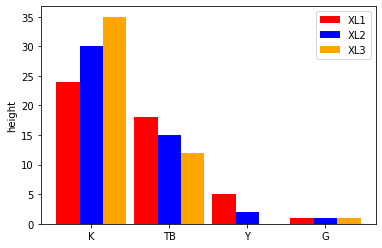

In [129]:
plt.bar(r1, xloai_nu['XL1'].values, color='red', width=0.3)
plt.bar(r2, xloai_nu['XL2'].values, color='blue', width=0.3)
plt.bar(r3, xloai_nu['XL3'].values, color='orange', width=0.3)
plt.xticks([r + 0.3 for r in range(len(xloai_nu['XL1'].values))], xloai_nu['XL1'].index)
plt.ylabel('height')
plt.legend(xloai_nu.columns.values)

In [199]:
tmp = df[['KHOI THI', 'KHU VUC THI', 'KQXT']].copy()
tmp = tmp[tmp['KHU VUC THI'].isin(['1', '2'])]
tmp = tmp[tmp['KHOI THI'].isin(['A', 'A1', 'B'])]
tmp['value'] = 1
xloai_dhkv = tmp.groupby(['KHOI THI', 'KHU VUC THI', 'KQXT']).sum()
xloai_dhkv.reset_index(inplace=True)
xloai_dhkv

,KHOI THI,KHU VUC THI,KQXT,value
0,A,1,DAU,2
1,A,1,ROT,27
2,A,2,DAU,2
3,A,2,ROT,7
4,A1,1,ROT,2
5,B,1,DAU,1
6,B,1,ROT,7


In [239]:
tmp = df[['KHOI THI', 'KHU VUC THI']].copy()
tmp['value'] = 1
xloai_dhkv = tmp.groupby(['KHOI THI', 'KHU VUC THI']).sum()
xloai_dhkv.reset_index(inplace=True)
xloai_dhkv

,KHOI THI,KHU VUC THI,value
0,A,1,29
1,A,2,9
2,A,2NT,11
3,A1,1,2
4,A1,2NT,4
5,B,1,8
6,B,2NT,1
7,C,1,8
8,C,2,2
9,C,2NT,4


In [242]:
tmp = df[['KHOI THI', 'KQXT']].copy()
tmp['value'] = 1
xloai_dhkv = tmp.groupby(['KHOI THI', 'KQXT']).sum()
xloai_dhkv.reset_index(inplace=True)
xloai_dhkv

,KHOI THI,KQXT,value
0,A,DAU,4
1,A,ROT,45
2,A1,ROT,6
3,B,DAU,2
4,B,ROT,7
5,C,DAU,4
6,C,ROT,10
7,D1,DAU,2
8,D1,ROT,20


In [244]:
tmp = df[['KHU VUC THI', 'KHOI THI', 'KQXT']].copy()
tmp['value'] = 1
xloai_dhkv = tmp.groupby(['KHU VUC THI', 'KHOI THI', 'KQXT']).sum()
xloai_dhkv.reset_index(inplace=True)
xloai_dhkv

,KHU VUC THI,KHOI THI,KQXT,value
0,1,A,DAU,2
1,1,A,ROT,27
2,1,A1,ROT,2
3,1,B,DAU,1
4,1,B,ROT,7
5,1,C,DAU,1
6,1,C,ROT,7
7,1,D1,ROT,13
8,2,A,DAU,2
9,2,A,ROT,7


ValueError: shape mismatch: objects cannot be broadcast to a single shape

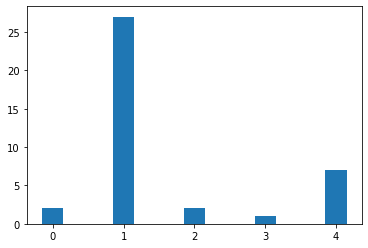

In [232]:
xloai_dhkv['KHOI THI'].values

array(['A', 'A', 'A', 'A', 'A1', 'B', 'B'], dtype=object)